<a href="https://colab.research.google.com/github/samuelorellanabarria/Analisis-Landing/blob/main/Copia_de__S%26P_500_Companies_with_Financial_Information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar los Datos y Librerias Necesarias

https://www.kaggle.com/datasets/paytonfisher/sp-500-companies-with-financial-information

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DataScience/01 - Proyectos/01 - S&P 500 Companies with Financial Information/Dataset/financials.csv")

# Analisis y Limpieza de los Datos

In [ ]:
df.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [ ]:
# Indagar sobre la Información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          505 non-null    object 
 1   Name            505 non-null    object 
 2   Sector          505 non-null    object 
 3   Price           505 non-null    float64
 4   Price/Earnings  503 non-null    float64
 5   Dividend Yield  505 non-null    float64
 6   Earnings/Share  505 non-null    float64
 7   52 Week Low     505 non-null    float64
 8   52 Week High    505 non-null    float64
 9   Market Cap      505 non-null    float64
 10  EBITDA          505 non-null    float64
 11  Price/Sales     505 non-null    float64
 12  Price/Book      497 non-null    float64
 13  SEC Filings     505 non-null    object 
dtypes: float64(10), object(4)
memory usage: 55.4+ KB


In [ ]:
# Diccionario de traducción
traducciones = {
    'Symbol': 'Símbolo',
    'Name': 'Empresa',
    'Sector': 'Sector',
    'Price': 'Precio',
    'Price/Earnings': 'Precio/Ganancias',
    'Dividend Yield': 'Rendimiento de dividendos',
    'Earnings/Share': 'Ganancias por acción',
    '52 Week Low': 'Mínimo de 52 semanas',
    '52 Week High': 'Máximo de 52 semanas',
    'Market Cap': 'Capitalización de mercado',
    'EBITDA': 'EBITDA',
    'Price/Sales': 'Precio/Ventas',
    'Price/Book': 'Precio/Valor en libros',
    'SEC Filings': 'Archivos de la SEC'
}

# Cambiar los nombres de las columnas
df = df.rename(columns=traducciones)

In [ ]:
df.head()

,Símbolo,Empresa,Sector,Precio,Precio/Ganancias,Rendimiento de dividendos,Ganancias por acción,Mínimo de 52 semanas,Máximo de 52 semanas,Capitalización de mercado,EBITDA,Precio/Ventas,Precio/Valor en libros,Archivos de la SEC
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


<Axes: >

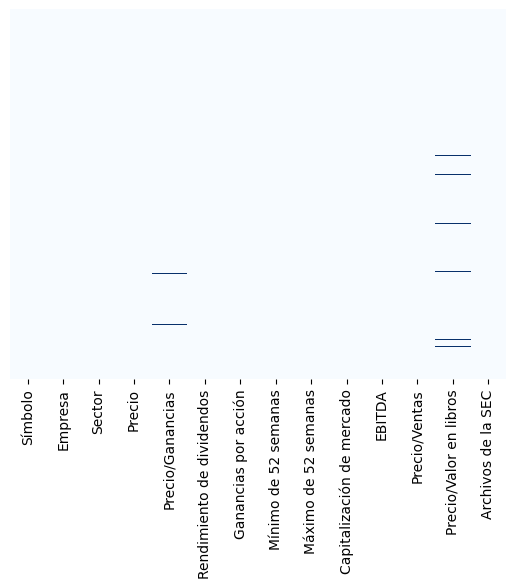

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap = "Blues")

In [ ]:
# Eliminar filas con valores nulos
df = df.dropna()
# Eliminar columna 'Archivos de la SEC'
df.drop('Archivos de la SEC', axis=1, inplace=True)
df.drop("Mínimo de 52 semanas", axis = 1, inplace=True)
df.drop("Máximo de 52 semanas", axis = 1, inplace=True)
df.drop("Símbolo", axis = 1, inplace=True)

<ipython-input-9-0732501cfcad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Archivos de la SEC', axis=1, inplace=True)
<ipython-input-9-0732501cfcad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Mínimo de 52 semanas", axis = 1, inplace=True)
<ipython-input-9-0732501cfcad>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Máximo de 52 semanas", axis = 1, inplace=True)
<ipython-input-9-0732501cfcad>:7: S

<Axes: >

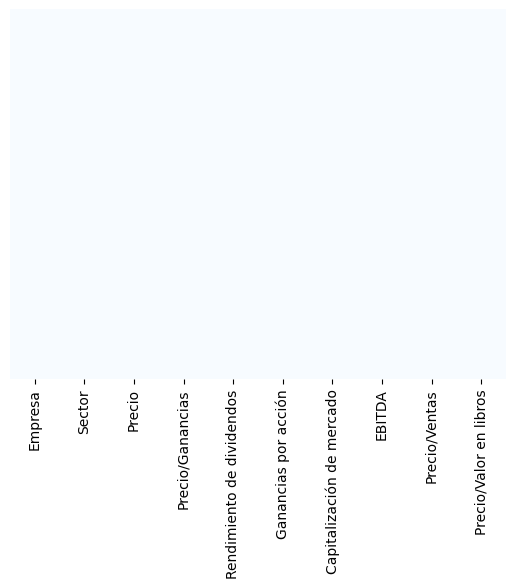

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap = "Blues")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 504
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Empresa                    495 non-null    object 
 1   Sector                     495 non-null    object 
 2   Precio                     495 non-null    float64
 3   Precio/Ganancias           495 non-null    float64
 4   Rendimiento de dividendos  495 non-null    float64
 5   Ganancias por acción       495 non-null    float64
 6   Capitalización de mercado  495 non-null    float64
 7   EBITDA                     495 non-null    float64
 8   Precio/Ventas              495 non-null    float64
 9   Precio/Valor en libros     495 non-null    float64
dtypes: float64(8), object(2)
memory usage: 42.5+ KB


In [ ]:
df.describe()

,Precio,Precio/Ganancias,Rendimiento de dividendos,Ganancias por acción,Capitalización de mercado,EBITDA,Precio/Ventas,Precio/Valor en libros
count,495.000000,495.000000,495.000000,495.000000,4.950000e+02,4.950000e+02,495.000000,495.000000
mean,104.106505,24.654303,1.901477,3.815192,4.937665e+10,3.576406e+09,3.953316,14.498687
std,135.372594,40.767081,1.541039,5.529133,9.069162e+10,6.880742e+09,3.485055,89.838923
min,2.820000,-251.530000,0.000000,-24.620000,2.626102e+09,-5.067000e+09,0.153186,0.510000
25%,46.355000,15.350000,0.795585,1.525000,1.274957e+10,7.708980e+08,1.631733,2.020000
50%,73.920000,19.450000,1.790190,2.890000,2.143378e+10,1.613000e+09,2.880285,3.400000
75%,116.735000,25.770000,2.797169,5.120000,4.499315e+10,3.657500e+09,4.728857,6.130000
max,1806.060000,520.150000,12.661196,44.090000,8.095080e+11,7.938600e+10,20.094294,1403.380000


# Visalización de Datos

<ipython-input-13-1359cc4456e7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


<Axes: >

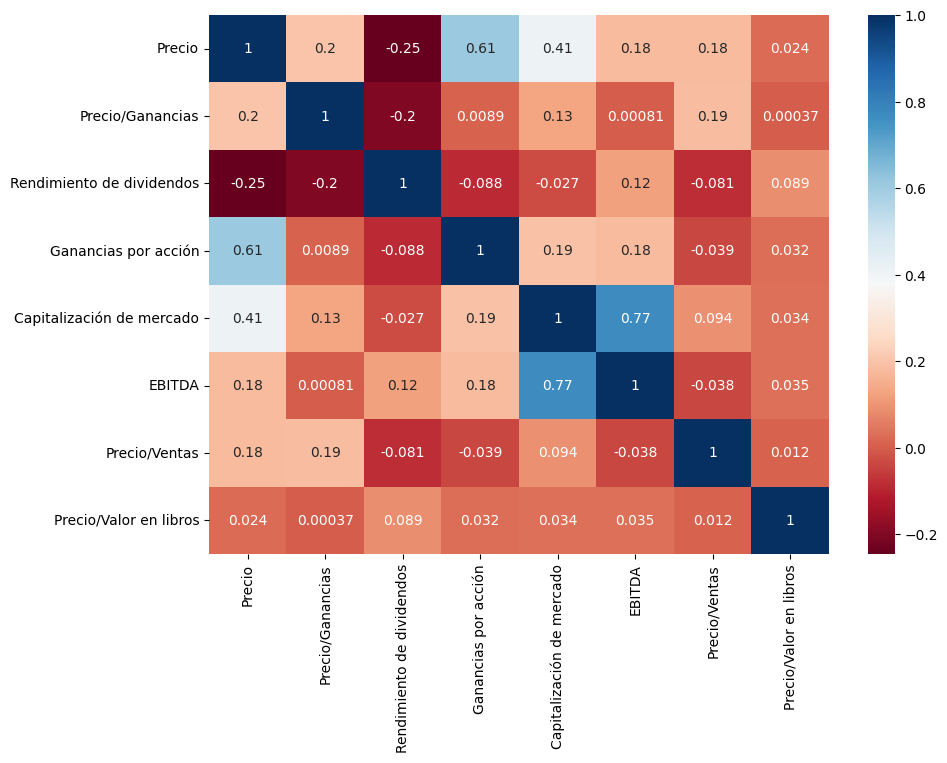

In [ ]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (10,7))
sns.heatmap(correlations, annot = True, cmap="RdBu")

#cmap = #viridis #coolwarm #RdBu #cubehelix #YlOrRd

array([[<Axes: title={'center': 'Precio'}>,
        <Axes: title={'center': 'Precio/Ganancias'}>,
        <Axes: title={'center': 'Rendimiento de dividendos'}>],
       [<Axes: title={'center': 'Ganancias por acción'}>,
        <Axes: title={'center': 'Capitalización de mercado'}>,
        <Axes: title={'center': 'EBITDA'}>],
       [<Axes: title={'center': 'Precio/Ventas'}>,
        <Axes: title={'center': 'Precio/Valor en libros'}>, <Axes: >]],
      dtype=object)

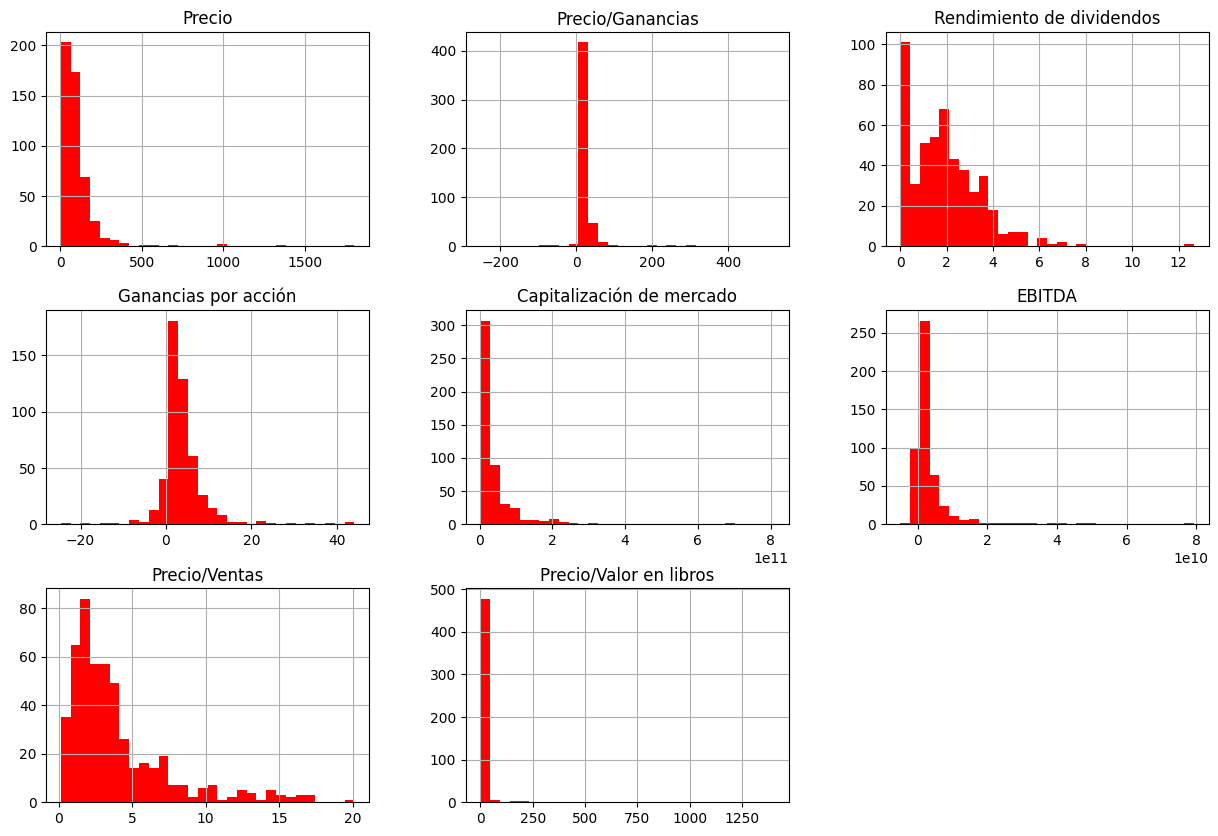

In [ ]:
df.hist(bins = 30, figsize=(15,10), color = 'r')

In [ ]:
df.head()

,Empresa,Sector,Precio,Precio/Ganancias,Rendimiento de dividendos,Ganancias por acción,Capitalización de mercado,EBITDA,Precio/Ventas,Precio/Valor en libros
0,3M Company,Industrials,222.89,24.31,2.332862,7.92,1.387211e+11,9.048000e+09,4.390271,11.34
1,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,1.078342e+10,6.010000e+08,3.575483,6.35
2,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,1.021210e+11,5.744000e+09,3.740480,3.19
3,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,1.813863e+11,1.031000e+10,6.291571,26.14
4,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,9.876586e+10,5.643228e+09,2.604117,10.62


In [ ]:
# Crear una funcion para seleccionar top 10 por cada columna una de forma mas rapida
df_t = df.nlargest(10, 'Rendimiento de dividendos')
df_t

,Empresa,Sector,Precio,Precio/Ganancias,Rendimiento de dividendos,Ganancias por acción,Capitalización de mercado,EBITDA,Precio/Ventas,Precio/Valor en libros
99,CenturyLink Inc,Telecommunication Services,16.20,8.35,12.661196,1.16,1.823720e+10,5.577000e+09,1.479598,1.39
269,Kimco Realty,Real Estate,14.01,9.28,7.713499,0.80,6.180487e+09,7.011900e+08,7.050894,1.20
257,Iron Mountain Incorporated,Real Estate,32.07,15.42,7.082580,0.46,9.410249e+09,1.116140e+09,3.289863,4.97
200,Ford Motor,Consumer Discretionary,10.43,5.89,6.784387,1.90,4.241433e+10,9.281000e+09,0.270541,1.26
405,SCANA Corp,Utilities,35.60,8.75,6.683033,4.16,5.229449e+09,1.459000e+09,1.651705,0.92
226,HCP Inc.,Real Estate,22.64,10.99,6.330197,1.33,1.096776e+10,1.412684e+09,8.127109,1.97
486,Welltower Inc.,Real Estate,54.67,12.74,6.153846,2.81,2.094368e+10,1.908253e+09,6.725218,1.49
291,Macy's Inc.,Consumer Discretionary,24.00,7.67,6.098546,1.98,7.541063e+09,2.446000e+09,0.455032,1.69
471,Ventas Inc,Real Estate,50.92,12.21,5.965641,1.86,1.886600e+10,1.935931e+09,7.074050,1.76
348,ONEOK,Energy,54.40,34.00,5.443620,1.66,2.198847e+10,1.851783e+09,2.615956,4.03


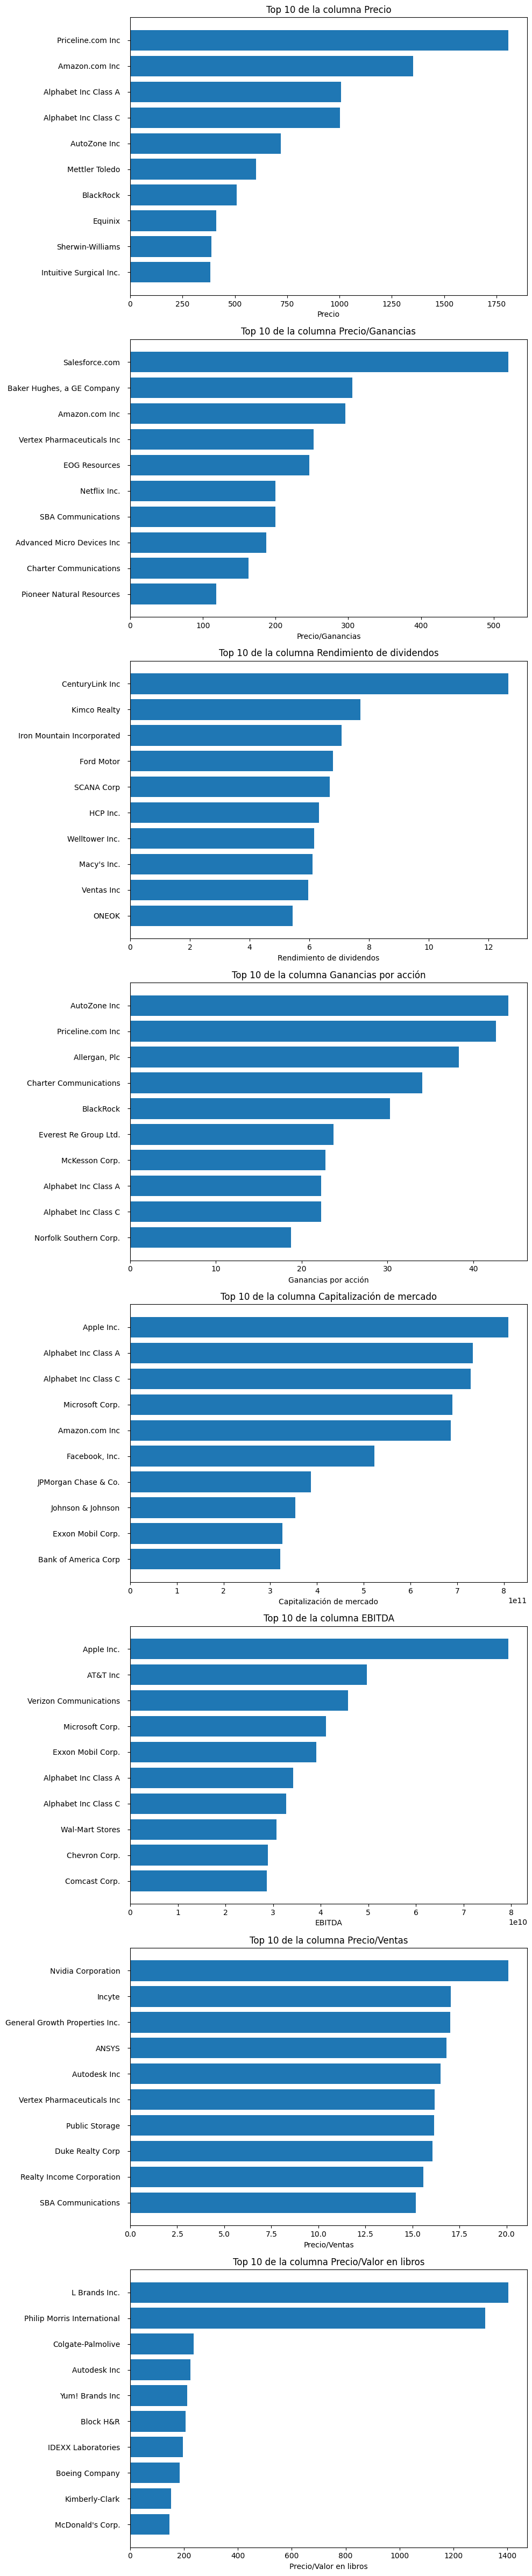

In [ ]:
dataset = df.drop("Sector", axis=1)

# Obtener las columnas numéricas del dataset
columnas_numericas = dataset.select_dtypes(include='number').columns.tolist()

# Obtener la cantidad de columnas numericas para saber cuantos subplot graficar
num_columnas = len(columnas_numericas)

# Obtener los top 10 de cada columna
top_10_por_empresa = {}
for columna in columnas_numericas:
    top_10_por_empresa[columna] = dataset.groupby('Empresa')[columna].nlargest(10).reset_index(level=0, drop=True)

# Crear una figura y subplots
fig, axs = plt.subplots(num_columnas, figsize=(10, 6*num_columnas))

# Iterar sobre las columnas numéricas y sus datos correspondientes
for i, columna in enumerate(columnas_numericas):
    valores = top_10_por_empresa[columna].sort_values(ascending=False).values[:10]
    nombres_empresas = [dataset.loc[idx, 'Empresa'] for idx in top_10_por_empresa[columna].sort_values(ascending=False).index][:10]

    # Configurar el subplot correspondiente con barras horizontales
    axs[i].barh(range(len(valores)), valores)
    axs[i].invert_yaxis()  # Invertir el eje y para que las barras se muestren de arriba a abajo
    axs[i].set(yticks=range(len(valores)), yticklabels=nombres_empresas, xlabel=columna, title=f'Top 10 de la columna {columna}')

    # Ajustar la separación entre los nombres en el eje x
    axs[i].tick_params(axis='y', which='major', pad=10)

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

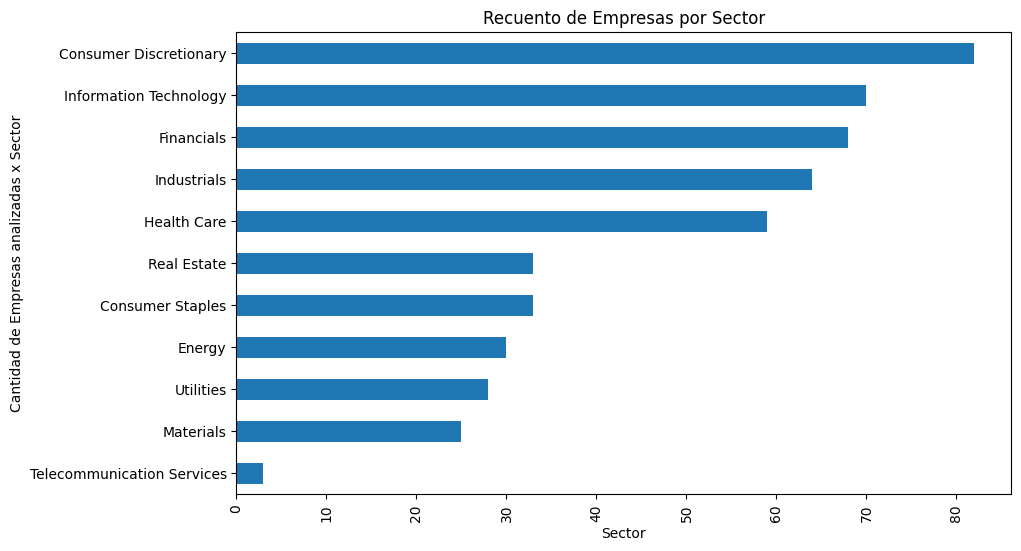

In [ ]:
df_ = df.groupby("Sector")["Empresa"].count().sort_values(ascending=True)

# Graficar el resultado
plt.figure(figsize=(10, 6))
df_.plot(kind='barh')
plt.xlabel("Sector")
plt.ylabel("Cantidad de Empresas analizadas x Sector")
plt.title("Recuento de Empresas por Sector")
plt.xticks(rotation=90)
plt.show()

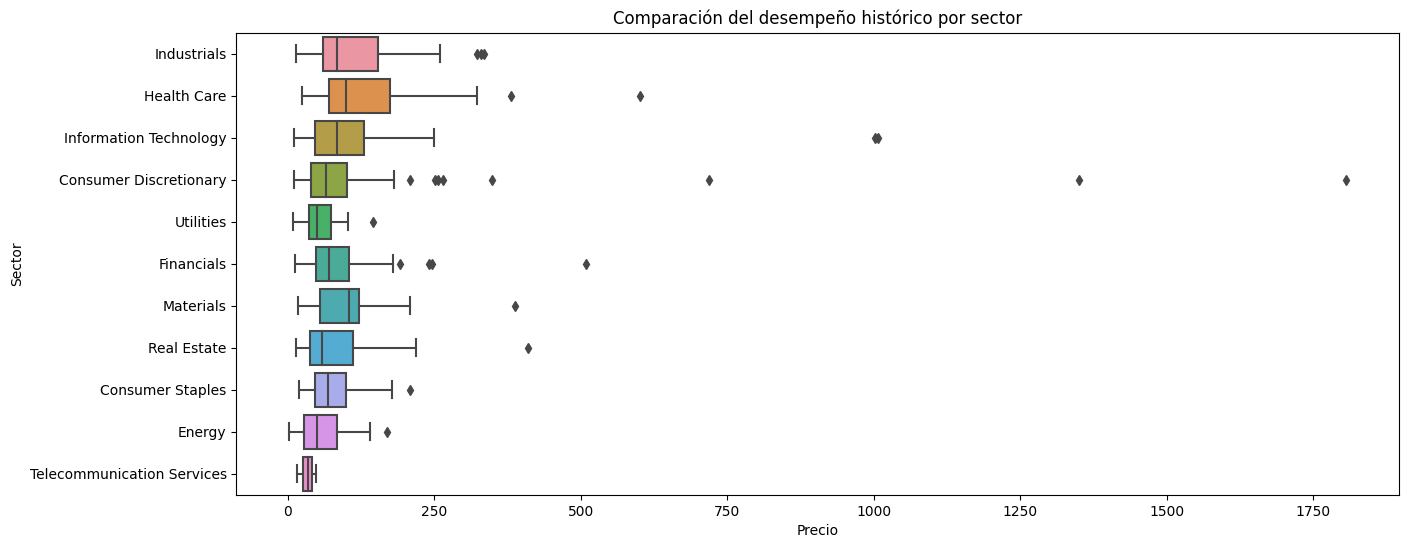

In [ ]:
# Realizar un análisis comparativo del desempeño histórico de los sectores
plt.figure(figsize=(15, 6))
sns.boxplot(y='Sector', x='Precio', data=df)
plt.xticks(rotation=0)
plt.xlabel('Precio')
plt.ylabel('Sector')
plt.title('Comparación del desempeño histórico por sector')
plt.show()

# Algoritmo No Supervisado de Clustering. Modelo KMeans

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
df_encoded = df.copy()
df_encoded.shape

(495, 10)

In [ ]:
df_encoded.head()

,Empresa,Sector,Precio,Precio/Ganancias,Rendimiento de dividendos,Ganancias por acción,Capitalización de mercado,EBITDA,Precio/Ventas,Precio/Valor en libros
0,3M Company,Industrials,222.89,24.31,2.332862,7.92,1.387211e+11,9.048000e+09,4.390271,11.34
1,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,1.078342e+10,6.010000e+08,3.575483,6.35
2,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,1.021210e+11,5.744000e+09,3.740480,3.19
3,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,1.813863e+11,1.031000e+10,6.291571,26.14
4,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,9.876586e+10,5.643228e+09,2.604117,10.62


In [ ]:
X = df_encoded.drop(["Empresa", "Sector"], axis = 1)
X.head()

,Precio,Precio/Ganancias,Rendimiento de dividendos,Ganancias por acción,Capitalización de mercado,EBITDA,Precio/Ventas,Precio/Valor en libros
0,222.89,24.31,2.332862,7.92,1.387211e+11,9.048000e+09,4.390271,11.34
1,60.24,27.76,1.147959,1.70,1.078342e+10,6.010000e+08,3.575483,6.35
2,56.27,22.51,1.908982,0.26,1.021210e+11,5.744000e+09,3.740480,3.19
3,108.48,19.41,2.499560,3.29,1.813863e+11,1.031000e+10,6.291571,26.14
4,150.51,25.47,1.714470,5.44,9.876586e+10,5.643228e+09,2.604117,10.62


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

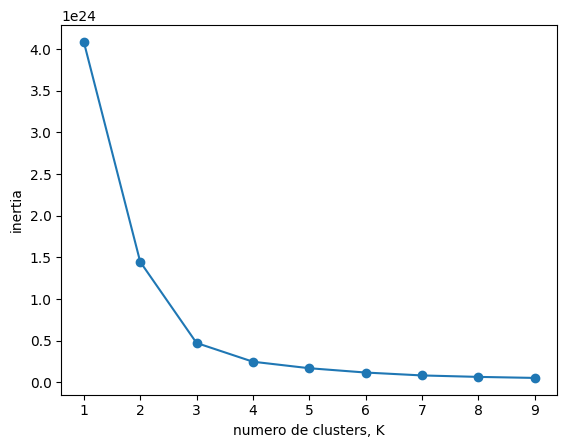

In [ ]:
ks = range(1, 10)
inertias = []

for k in ks:
    # Crear instancia KMeans con k clusters: model
    model=KMeans(n_clusters=k)

    # Entrenar el modelo con nuestros datos
    model.fit(X)

    # Añadir el atributo de inercia a la lista de inercias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('numero de clusters, K')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

#El gráfico resultante mostrará la relación entre el número de clusters y la inercia. El objetivo es encontrar el "codo" en el gráfico,
#es decir, el punto en el que agregar más clusters ya no mejora significativamente la inercia.
#Esto puede ayudar a determinar el número óptimo de clusters en un problema de agrupamiento utilizando el algoritmo K-means.

In [ ]:
# Creamos el modelo KMeans con 4 clusters
model = KMeans(n_clusters=4)

In [ ]:
# Lo pasamos a un array
X = X.values

In [ ]:
# Entrenamos el modelo
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
# Obtener los Centroides
centroids = model.cluster_centers_

In [ ]:
labels = model.labels_
print(labels)

[3 0 3 1 3 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 2 2 3 2 0 0 0 3 0 3
 0 0 0 0 3 0 0 0 0 0 3 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 3 3 0
 1 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 3 3 0 1 0 3 0 0 0 0
 0 1 1 0 0 0 0 1 0 3 1 0 0 0 3 0 0 0 3 0 0 0 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 2 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 3 0 3 0 3 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 3 0 0 0 0 0 0 0 0 3 0 0 0 1 0 3 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 3 0 0 3 0 3 0 0 0 0 0 0 0 0 0 1 0
 0 3 0 3 3 0 0 0 0 0 0 2 0 0 0 3 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 0 3 0 3 0 0
 0 0 0 3 0 0 0 3 0 0 0 1 0 0 0 0 0 3 0 0 0 1 0 3 0 0 0 3 0 0 0 0 3 0 1 0 0
 0 0 0 0 0 0 3 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0
 0 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 0 3 3 0 3 0 0 0 0 0 0
 3 0 3 0 0 0 0 0 1 3 0 3 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 3 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
X.shape

(495, 8)

In [ ]:
model.cluster_centers_.shape

(4, 8)

In [ ]:
df_X = pd.DataFrame(X)
series_labels = pd.Series(labels)

In [ ]:
df_encoded.columns

Index(['Empresa', 'Sector', 'Precio', 'Precio/Ganancias',
       'Rendimiento de dividendos', 'Ganancias por acción',
       'Capitalización de mercado', 'EBITDA', 'Precio/Ventas',
       'Precio/Valor en libros'],
      dtype='object')

In [ ]:
empresa_sector = df_encoded.iloc[:, :2]
cabeceras = ['Empresa', 'Sector', 'Precio', 'Precio/Ganancias',
       'Rendimiento de dividendos', 'Ganancias por acción',
       'Capitalización de mercado', 'EBITDA', 'Precio/Ventas',
       'Precio/Valor en libros', "Cluster"]

# Reiniciar los índices de los dataframes
empresa_sector = empresa_sector.reset_index(drop=True)
df_X = df_X.reset_index(drop=True)
series_labels = series_labels.reset_index(drop=True)

df_cluster = pd.concat([empresa_sector, df_X, series_labels], axis = 1)
df_cluster.columns = cabeceras

In [ ]:
df_cluster

,Empresa,Sector,Precio,Precio/Ganancias,Rendimiento de dividendos,Ganancias por acción,Capitalización de mercado,EBITDA,Precio/Ventas,Precio/Valor en libros,Cluster
0,3M Company,Industrials,222.89,24.31,2.332862,7.92,1.387211e+11,9.048000e+09,4.390271,11.34,3
1,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,1.078342e+10,6.010000e+08,3.575483,6.35,0
2,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,1.021210e+11,5.744000e+09,3.740480,3.19,3
3,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,1.813863e+11,1.031000e+10,6.291571,26.14,1
4,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,9.876586e+10,5.643228e+09,2.604117,10.62,3
...,...,...,...,...,...,...,...,...,...,...,...
490,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,1.291502e+10,7.220000e+08,2.726209,5.31,0
491,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,2.700330e+10,2.289000e+09,6.313636,212.08,0
492,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,2.445470e+10,2.007400e+09,3.164895,2.39,0
493,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,1.067068e+10,0.000000e+00,3.794579,1.42,0


In [ ]:
df_cluster.groupby('Cluster')["Empresa"].count()

Cluster
0    395
1     25
2      6
3     69
Name: Empresa, dtype: int64

In [ ]:
df_cluster.groupby('Cluster').mean()

<ipython-input-37-8b2d3a9127f2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cluster.groupby('Cluster').mean()


,Precio,Precio/Ganancias,Rendimiento de dividendos,Ganancias por acción,Capitalización de mercado,EBITDA,Precio/Ventas,Precio/Valor en libros
Cluster,,,,,,,,
0,86.758886,21.885139,1.899191,3.246734,2.064216e+10,1.784615e+09,3.848939,11.531899
1,98.307200,21.627200,2.442794,4.224400,2.374930e+11,1.728004e+10,3.992971,15.721200
2,628.578333,73.075000,0.575722,11.376667,6.951904e+11,3.785867e+10,6.885845,9.313333
3,159.910290,37.393043,1.833715,6.263623,8.955537e+10,5.887606e+09,4.281464,31.490435


In [ ]:
df_filtrado = df_cluster[df_cluster['Cluster'] == 2]
df_filtrado

,Empresa,Sector,Precio,Precio/Ganancias,Rendimiento de dividendos,Ganancias por acción,Capitalización de mercado,EBITDA,Precio/Ventas,Precio/Valor en libros,Cluster
27,Alphabet Inc Class A,Information Technology,1007.71,31.48,0.000000,22.27,7.338240e+11,3.421700e+10,6.801692,4.70,2
28,Alphabet Inc Class C,Information Technology,1001.52,40.29,0.000000,22.27,7.285356e+11,3.271400e+10,6.772653,4.67,2
30,Amazon.com Inc,Consumer Discretionary,1350.50,296.16,0.000000,6.16,6.858734e+11,1.613200e+10,3.927053,24.28,2
51,Apple Inc.,Information Technology,155.15,16.86,1.579541,9.20,8.095080e+11,7.938600e+10,3.458609,5.66,2
186,"Facebook, Inc.",Information Technology,171.58,27.90,0.000000,5.39,5.234230e+11,2.362400e+10,13.241967,7.08,2
307,Microsoft Corp.,Information Technology,85.01,25.76,1.874791,2.97,6.899784e+11,4.107900e+10,7.113097,9.49,2


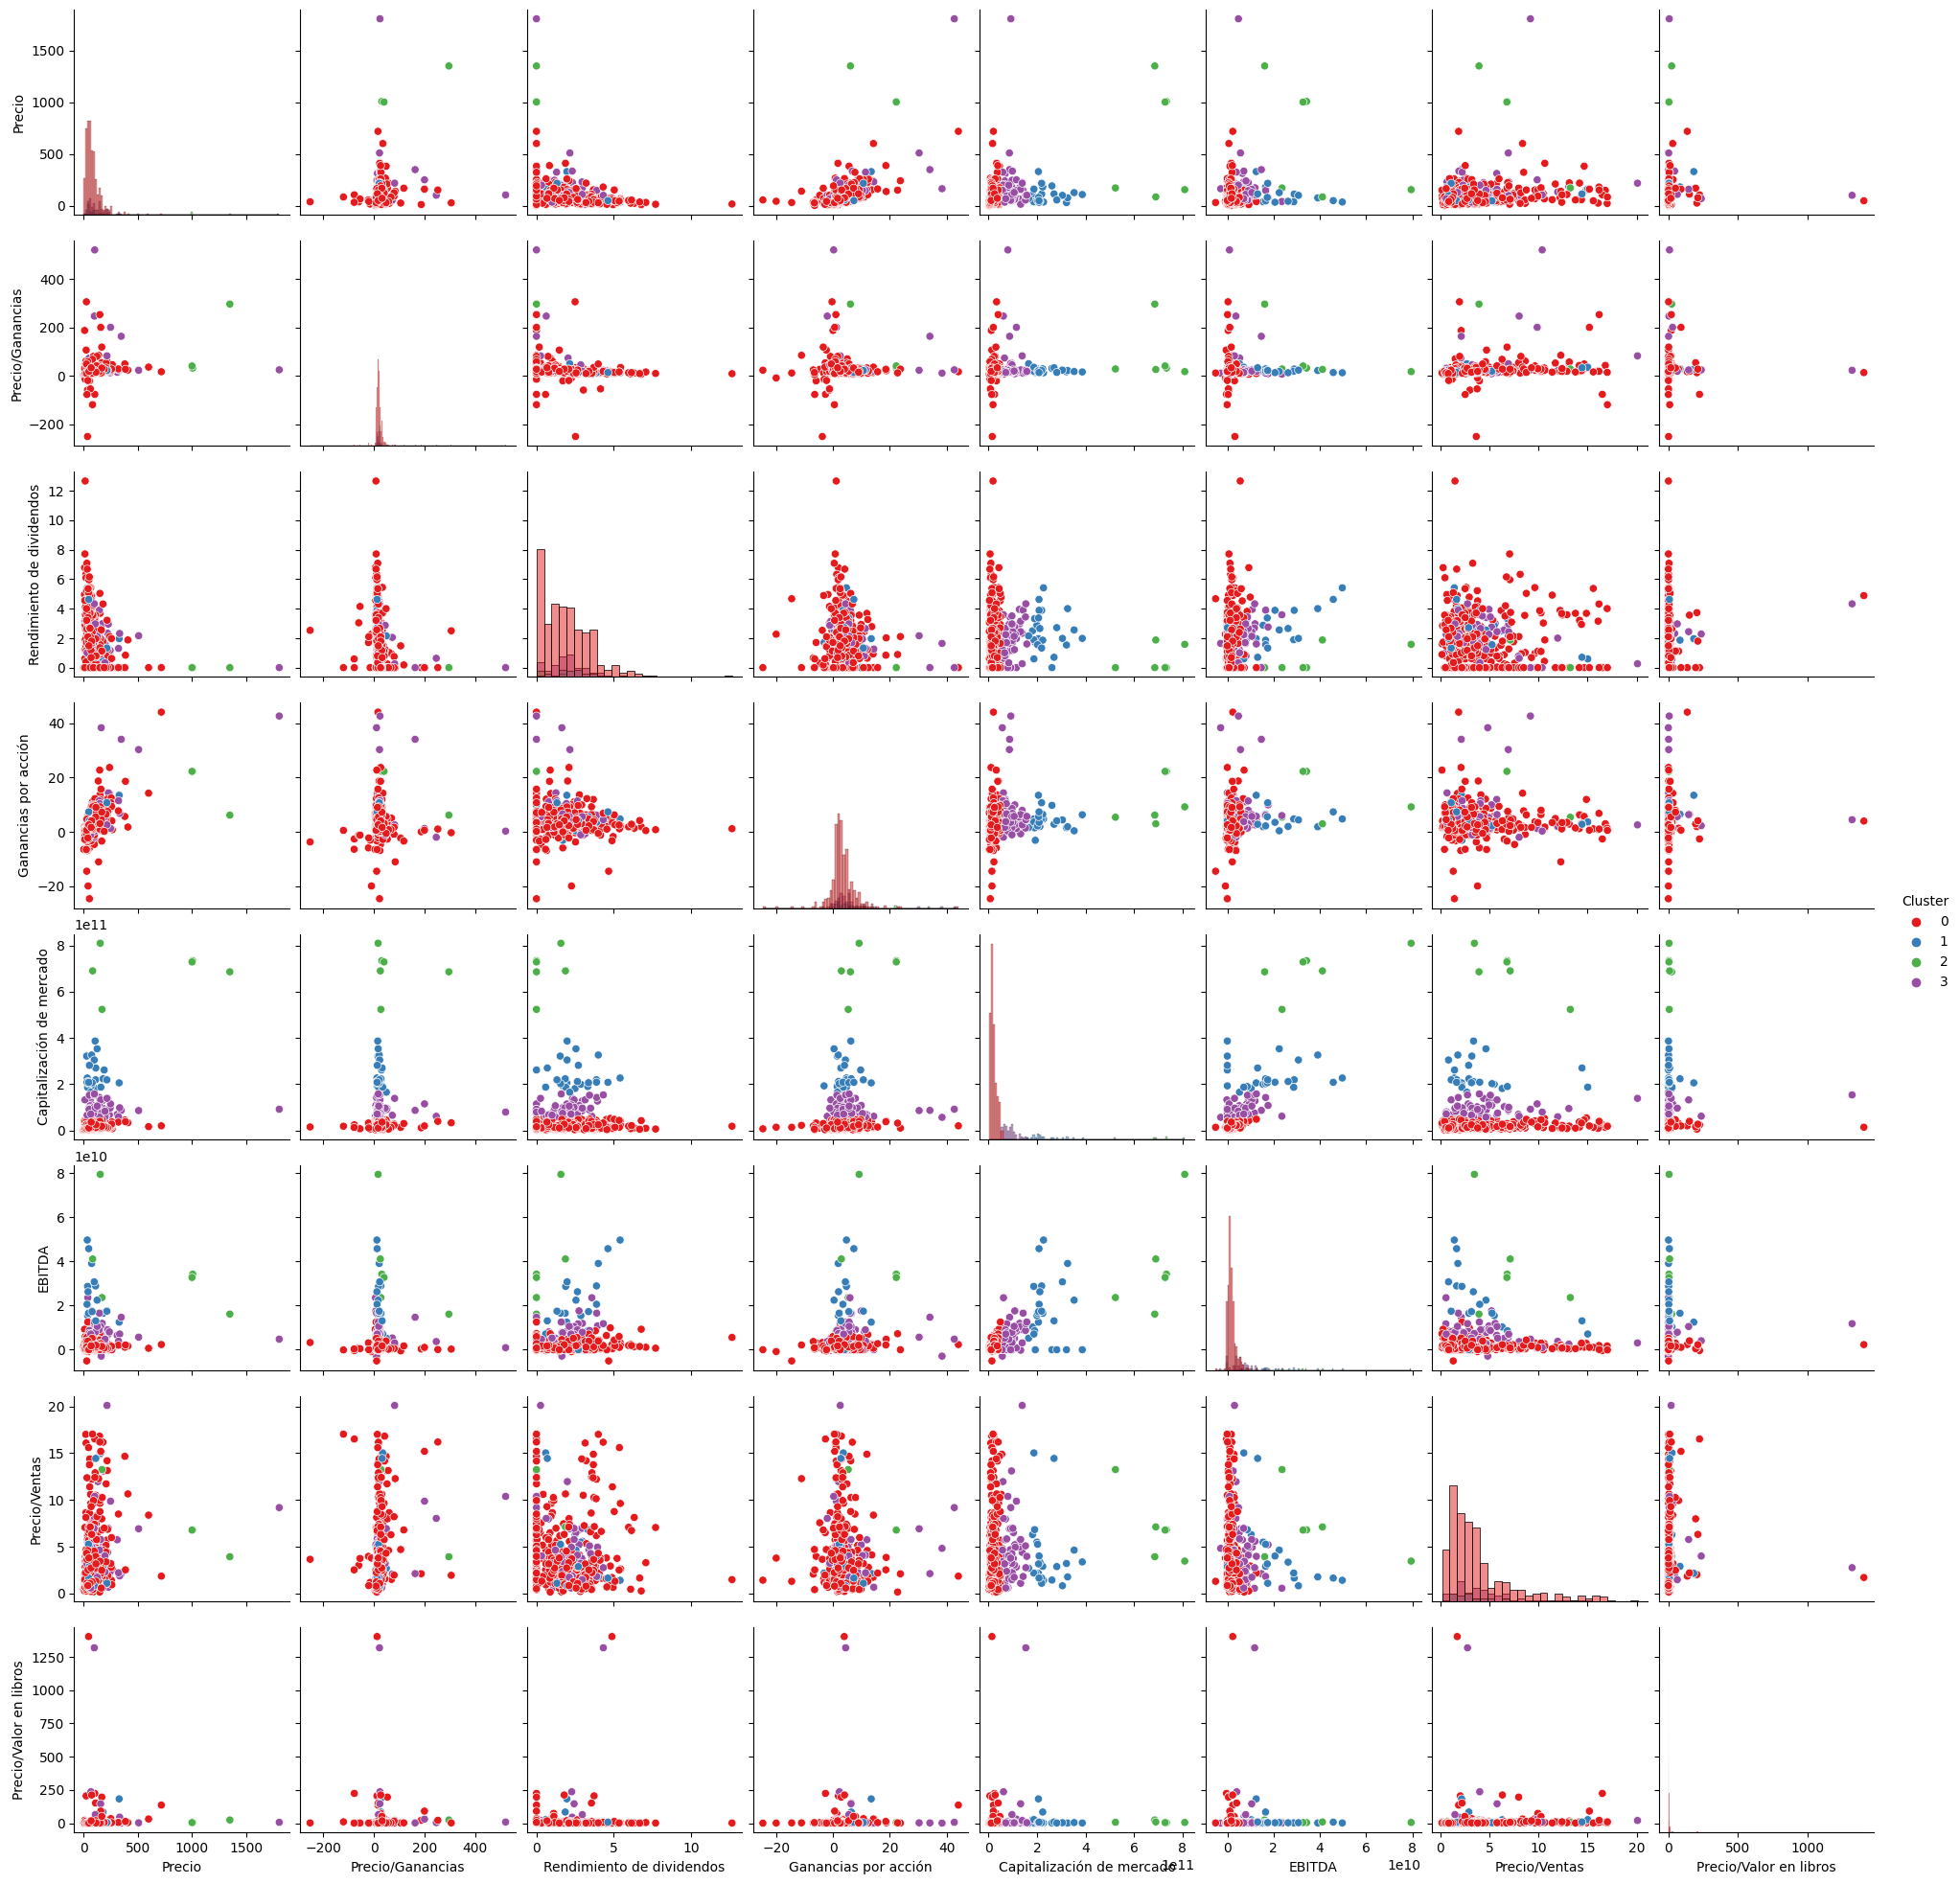

In [ ]:
# Seleccionar las columnas a visualizar
columnas_visualizar = ['Empresa', 'Sector', 'Precio', 'Precio/Ganancias',
                       'Rendimiento de dividendos', 'Ganancias por acción',
                       'Capitalización de mercado', 'EBITDA', 'Precio/Ventas',
                       'Precio/Valor en libros', "Cluster"]

# Crear un subconjunto del dataframe con las columnas seleccionadas
df_subset = df_cluster[columnas_visualizar]

# Visualizar todas las columnas en un gráfico de dispersión múltiple
sns.pairplot(data=df_subset, hue='Cluster', palette='Set1', diag_kind='hist')

# Mostrar el gráfico
plt.show()

#Este grafico de dispersion multiple, permite visualizar las relaciones y patrones entre las variables y cómo se agrupan en diferentes clusters.

In [ ]:
#from google.colab import files

#df_cluster.to_excel("df_cluster_.xlsx")
#files.download("df_cluster_.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>